In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
temps = np.loadtxt("weatherstats_vancouver_daily.csv", delimiter=",", usecols=(3), skiprows=(1))
print(temps)

[ 3.3   3.2   3.5  ... 20.1  19.64 17.6 ]


# Mean

In [3]:
def findmean(numlist):
    '''input list of floats'''
    allsum = 0
    i = 0
    for i in range(len(numlist)):
        allsum += numlist[i]
    mean = allsum/len(numlist)
    return mean

In [4]:
print(f'The average temperature is %3.3f \u00b0C' % (findmean(temps)))

The average temperature is 10.590 °C


In [5]:
print(f'The average temperature is %3.3f \u00b0C' % (np.mean(temps)))

The average temperature is 10.590 °C


# Standard Deviation

In [6]:
def findStDev(numlist):
    '''input list of floats'''
    mean = np.mean(numlist)
    squaresum, allsum, i = 0, 0, 0
    for i in range(len(numlist)-1):
        squaresum += numlist[i]**2
        allsum += numlist[i]
    StDev = ((squaresum - (allsum**2)/(len(numlist)))/len(numlist))**0.5
    return StDev

In [7]:
np.std(temps)

5.797092979488857

In [8]:
print(f'The standard deviation of average daily temperatures is %3.3f \u00b0C' % (findStDev(temps)))

The standard deviation of average daily temperatures is 5.798 °C


# Histogram

In [9]:
def makeHist(x, minvalue, maxvalue, n, normalize = False): #x = list of floats, n = number of bins
    x.sort()
    cutlist = [num for num in x if num>minvalue and num<maxvalue]
    '''calculate size of bins'''
    binsize = (maxvalue-minvalue)/n

    '''generate list of locations of each bin'''
    binlist = [minvalue+binsize/2]*n
    b=0
    for b in range(n):
        binlist[b]= binlist[b]+b*binsize

    '''calculate which bin each item belongs to'''
    i=0
    bindex = 0
    valuecount = [0]*len(binlist)
    for i in range(len(cutlist)):
        bindex = abs(cutlist[i]-binlist[0])//binsize
        bindex = int(bindex)
        '''add 1 to valuecount list for each item falling into matching bin/index number'''
        valuecount[bindex]+=1
        
    if normalize == True:
        valuecount = [num/len(cutlist) for num in valuecount]
        
    return binlist, valuecount

    

### function development cell below

In [10]:
minvalue = 10
maxvalue = 30
bins = 4

lst = [23,10,3,34,28,39,22,7,35,30,21,9,36,17,26,12,13,15,28,39,37,25,26,24,14,16,13,15,19,20,10,39,35,26]
lst.sort() #sort items in list
print(lst)

cutlist = [num for num in lst if num>minvalue and num<maxvalue]
print(cutlist)

'''calculate size of bins'''
binsize = (maxvalue-minvalue)/bins
print(binsize)
'''generate list of locations of each bin'''
Binlist = [minvalue+binsize/2]*bins
b=1
for b in range(bins):
    Binlist[b]= Binlist[b]+b*binsize
    b+=1

'''calculate which bin each item belongs to'''
i=0
bindex = 0
valuecount = [0]*len(Binlist)
for i in range(len(cutlist)):
    bindex = abs(cutlist[i]-Binlist[0])//binsize
    bindex = int(bindex)
    '''add 1 to valuecount list for each item falling into matching bin/index number'''
    valuecount[bindex]+=1
    
print(Binlist)
print(valuecount)

valuecount = [num/len(cutlist) for num in valuecount]
print(valuecount)


[3, 7, 9, 10, 10, 12, 13, 13, 14, 15, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 26, 26, 28, 28, 30, 34, 35, 35, 36, 37, 39, 39, 39]
[12, 13, 13, 14, 15, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 26, 26, 28, 28]
5.0
[12.5, 17.5, 22.5, 27.5]
[8, 4, 6, 2]
[0.4, 0.2, 0.3, 0.1]


## Plotting with function values

In [11]:
x, y = makeHist(temps, -10.5, 30, 100, True)
print(sum(y))

0.9999999999999996


Text(-10, 0.02, '$\\bar{x}=$10.590 $\\sigma=$5.795')

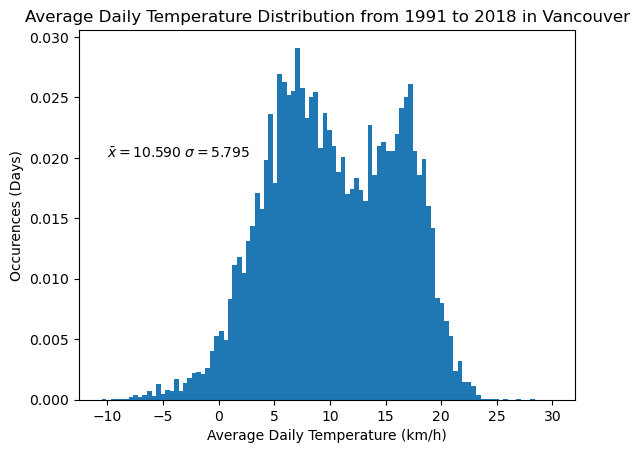

In [12]:
from scipy.stats import norm

x, y = makeHist(temps, -10.5, 30, 100, normalize=True)

plt.xlabel("Average Daily Temperature (km/h)")
plt.ylabel("Occurences (Days)")
plt.title("Average Daily Temperature Distribution from 1991 to 2018 in Vancouver")
plt.bar(x, y, width=0.43, align='center', alpha=1)

plt.text(-10, 0.02, r'$\bar{x}=$%3.3f $\sigma=$%3.3f' % (findmean(temps), findStDev(temps)))

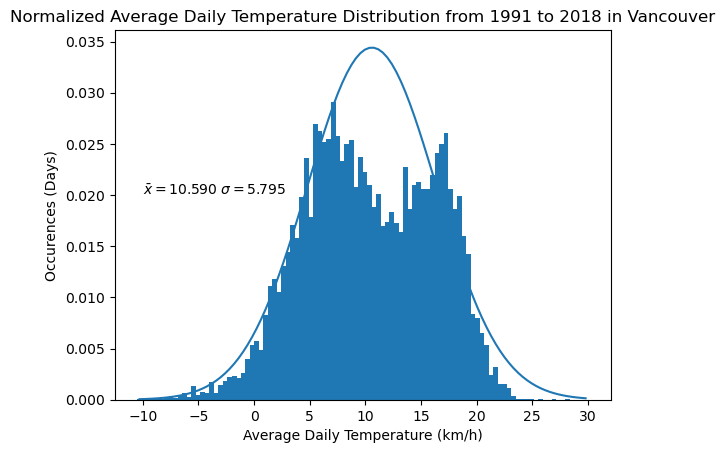

In [13]:
from scipy.stats import norm

x, y = makeHist(temps, -10.5, 30, 100, normalize=True)

plt.xlabel("Average Daily Temperature (km/h)")
plt.ylabel("Occurences (Days)")
plt.title("Normalized Average Daily Temperature Distribution from 1991 to 2018 in Vancouver")
plt.bar(x, y, width=0.43, align='center', alpha=1)

plt.text(-10, 0.02, r'$\bar{x}=$%3.3f $\sigma=$%3.3f' % (findmean(temps), findStDev(temps)))

plt.plot(x, 0.5*norm.pdf(x,findmean(temps),findStDev(temps)))

plt.savefig("YVR_DailyTemp_myHisto_Lab0_Tso.pdf", dpi=150)

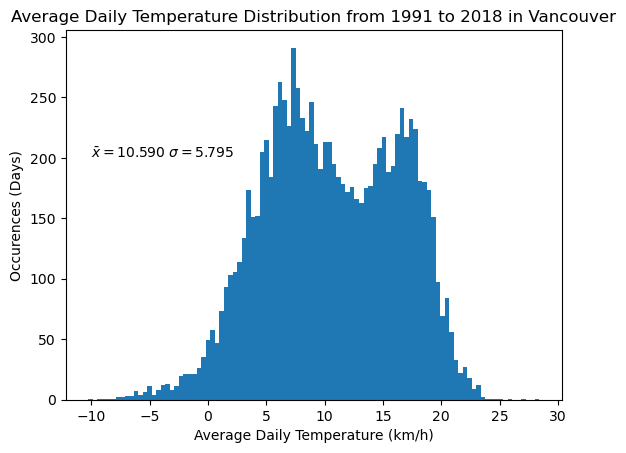

<Figure size 640x480 with 0 Axes>

In [14]:
plt.hist(temps, bins=100)
plt.text(-10, 200, r'$\bar{x}=$%3.3f $\sigma=$%3.3f' % (findmean(temps), findStDev(temps)))
plt.xlabel("Average Daily Temperature (km/h)")
plt.ylabel("Occurences (Days)")
plt.title("Average Daily Temperature Distribution from 1991 to 2018 in Vancouver")
plt.show()

plt.savefig("YVR_DailyTemp_autoHisto_Lab0_Tso.pdf", dpi=150)

# Box-Muller Transform

In [51]:
def BoxMull(u1, u2):
    z1, z2 = 0, 0
    z1 = math.cos(2*math.pi*u2)*(-2*math.log(u1))**0.5
    z2 = math.sin(2*math.pi*u2)*(-2*math.log(u1))**0.5
    return z1, z2

In [67]:
x, y = BoxMull(random.random(), random.random())
print(x, y)

-1.8479828353467072 0.13915544585660888


## Histogram using random.normal vs BoxMull function's z1, z2 histograms

(array([  1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   2.,
          3.,   2.,   4.,   6.,   6.,   3.,   5.,   7.,   7.,  16.,  15.,
         20.,  22.,  33.,  27.,  37.,  39.,  70.,  65.,  62.,  83.,  89.,
         99., 120., 138., 161., 190., 195., 198., 207., 229., 262., 261.,
        269., 293., 301., 326., 330., 324., 330., 319., 313., 336., 350.,
        324., 288., 297., 286., 245., 206., 237., 238., 208., 164., 148.,
        161., 136., 119., 116.,  98.,  84.,  92.,  68.,  52.,  36.,  39.,
         40.,  32.,  17.,  22.,  19.,   5.,  10.,   3.,   9.,   3.,   4.,
          4.,   1.,   5.,   1.,   2.,   2.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-4.24954785, -4.16703329, -4.08451872, -4.00200416, -3.9194896 ,
        -3.83697504, -3.75446047, -3.67194591, -3.58943135, -3.50691678,
        -3.42440222, -3.34188766, -3.2593731 , -3.17685853, -3.09434397,
        -3.01182941, -2.92931484, -2.84680028, -2.76428572, -2.68177116,
        -2.59925659, -2.51

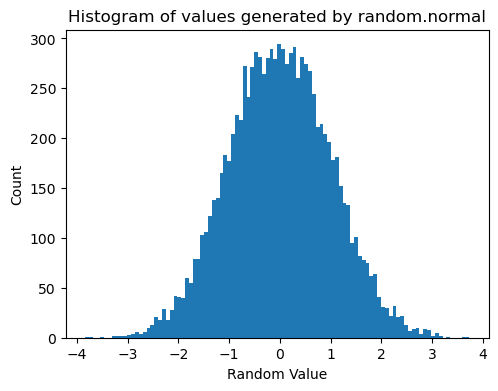

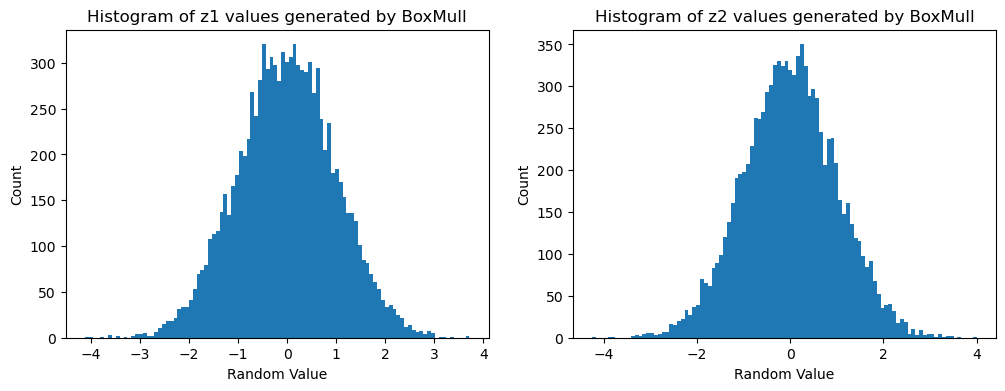

In [85]:
i = 0
randvalues0 = np.random.normal(0, size = 10000)
randvalues1 = [0]*10000
randvalues2 = [0]*10000
for i in range(10000):
    randvalues1[i], randvalues2[i] = BoxMull(random.random(), random.random())

    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Histogram of values generated by random.normal')
plt.xlabel('Random Value')
plt.ylabel('Count')
plt.hist(randvalues0, bins = 100)


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Histogram of z1 values generated by BoxMull')
plt.xlabel('Random Value')
plt.ylabel('Count')
plt.hist(randvalues1, bins = 100)
plt.subplot(1,2,2)
plt.title('Histogram of z2 values generated by BoxMull')
plt.xlabel('Random Value')
plt.ylabel('Count')
plt.hist(randvalues2, bins = 100)
    

# Bonus 1: Plotting

In [87]:
import datetime